In [181]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import _extrapolate_trend
import statsmodels.graphics.tsaplots as tsaplots

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel


# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Given a dataset containing information on used cars, the objective is to perform a regression analysis to determine the factors that significantly impact the price of a used car. The goal is to identify the most influential features among the available variables and build a predictive model that can estimate the price of a used car based on these features. This data task involves data cleaning, feature engineering, exploratory data analysis, statistical analysis, and model building using machine learning techniques to uncover the underlying relationships between the car's attributes and its price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### To get familiar with the dataset and identify any quality issues, here are some steps we can take

1. Load the Dataset:

In [10]:
df = pd.read_csv('data/vehicles.csv')

Check the dimensions and structure by using 'shape' or 'head' from our Dataset

In [11]:
df.shape

(426880, 18)

In [13]:
df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [17]:
df.sample(5)

id                 region  price    year   manufacturer  \
241971  7311625180  raleigh / durham / CH   5990  2009.0        lincoln   
318010  7310517847                 eugene  10988  2009.0  mercedes-benz   
288072  7304378282         akron / canton   5999  2009.0        hyundai   
168646  7302055472                 topeka  13990  2018.0      chevrolet   
168329  7312879047                 topeka  27990  2017.0      chevrolet   

                        model  condition    cylinders    fuel  odometer  \
241971            mkz sdn awd  excellent  6 cylinders     gas  132167.0   
318010                m-class        NaN          NaN  diesel  102618.0   
288072               santa fe        NaN          NaN   other  176869.0   
168646                 malibu       good  4 cylinders     gas  128687.0   
168329  colorado extended cab       good          NaN     gas   22120.0   

       title_status transmission                VIN drive size    type  \
241971          NaN    automatic  3LNHM28T49R633546   4wd  NaN   sedan   
318010        clean    automatic  4JGBB25E49A481828   NaN  NaN     SUV   
288072        clean    automatic  5NMSH73E89H243795   NaN  NaN   wagon   
168646        clean    automatic  1G1ZD5ST7JF187678   fwd  NaN   sedan   
168329        clean        other  1GCHSCEA7H1203280   NaN  NaN  pickup   

       paint_color state  
241971         NaN    nc  
318010       black    or  
288072       black    oh  
168646       white    ks  
168329         NaN    ks

Now, let's review the features' information

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Analyze summary statistics. Let's review the statistics for each column to identify any outliers or inconsistencies.

In [20]:
df.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

Identify missing values. We can the isnull() method along with the sum() method to identify the number of missing values in each column and divide them by the total of rows to evaluate the % of nulls for each column.

In [23]:
df.isnull().sum()/426880

id              0.000000
region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64

Investigate unique values

In [24]:
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

One of the first thing I'll do for this dataset, is to remove unnecessary features like VIN, since this is a unique indentifier and with our ID, is enough. I will also set ID as an index. 

In [25]:
# Remove the 'VIN' column
df.drop('VIN', axis=1, inplace=True)

# Set 'id' as the index
df.set_index('id', inplace=True)

In [26]:
df.head()

region  price  year manufacturer model condition  \
id                                                                             
7222695916                prescott   6000   NaN          NaN   NaN       NaN   
7218891961            fayetteville  11900   NaN          NaN   NaN       NaN   
7221797935            florida keys  21000   NaN          NaN   NaN       NaN   
7222270760  worcester / central MA   1500   NaN          NaN   NaN       NaN   
7210384030              greensboro   4900   NaN          NaN   NaN       NaN   

           cylinders fuel  odometer title_status transmission drive size type  \
id                                                                              
7222695916       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
7218891961       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
7221797935       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
7222270760       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
7210384030       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   

           paint_color state  
id                            
7222695916         NaN    az  
7218891961         NaN    ar  
7221797935         NaN    fl  
7222270760         NaN    ma  
7210384030         NaN    nc

In [105]:
df.sample(100)

region  price    year manufacturer  \
id                                                         
7313839728             salem    406  2017.0         ford   
7316301093   fresno / madera   4999  2006.0        honda   
7310050210             maine   7995  2011.0       toyota   
7315456395           atlanta  19990  2018.0        mazda   
7311126744           buffalo  15995  2005.0          gmc   
...                      ...    ...     ...          ...   
7316424681             tulsa  15988  2017.0       nissan   
7305559944  colorado springs  22990  2018.0     cadillac   
7315753401          columbia   3495  2001.0      lincoln   
7314373883             maine  15699  2014.0          bmw   
7315853204      st louis, MO  37990  2020.0          kia   

                                 model  condition    cylinders    fuel  \
id                                                                       
7313839728                       f-150        NaN  8 cylinders     gas   
7316301093                         crv  excellent  4 cylinders     gas   
7310050210                       prius       good  4 cylinders  hybrid   
7315456395     mazda3 touring sedan 4d       good          NaN     gas   
7311126744                       c8500  excellent  6 cylinders  diesel   
...                                ...        ...          ...     ...   
7316424681                      maxima        NaN          NaN     gas   
7305559944         ats luxury sedan 4d       good          NaN     gas   
7315753401                 continental  excellent  8 cylinders     gas   
7314373883                       328xi   like new  4 cylinders     gas   
7315853204  telluride lx sport utility       good          NaN   other   

            odometer title_status transmission drive      size   type  \
id                                                                      
7313839728   85770.0        clean    automatic   4wd       NaN  truck   
7316301093  180000.0        clean    automatic   4wd  mid-size    SUV   
7310050210  152044.0        clean    automatic   fwd       NaN    NaN   
7315456395   16524.0        clean        other   fwd       NaN  sedan   
7311126744   97000.0        clean    automatic   rwd       NaN  truck   
...              ...          ...          ...   ...       ...    ...   
7316424681  100865.0        clean    automatic   fwd       NaN  sedan   
7305559944   26937.0        clean        other   rwd       NaN  sedan   
7315753401  191767.0        clean    automatic   fwd       NaN    NaN   
7314373883   97000.0        clean    automatic   4wd       NaN  wagon   
7315853204   22524.0        clean        other   NaN       NaN  other   

           paint_color state  
id                            
7313839728         NaN    or  
7316301093      silver    ca  
7310050210         NaN    me  
7315456395       black    ga  
7311126744       white    ny  
...                ...   ...  
7316424681       black    ok  
7305559944      silver    co  
7315753401         NaN    sc  
7314373883       black    me  
7315853204       black    il  

[100 rows x 16 columns]

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

First, let's try to build a simple Linear Regression model based on odometer, in order to predict the price:

In [106]:
#Lets first have a new dataframe with rows removed from the Column 'odometer' NaN values:

df_simpleL = df.dropna(subset=['odometer'])


X = df_simpleL[['odometer']]
y = df_simpleL['price']

linreg = LinearRegression().fit(X, y)

#New column
df_simpleL['price_prediction'] = linreg.predict(X)

#Line Equation:
slope = round(float(linreg.coef_), 2)
intercept = round(float(linreg.intercept_), 2)

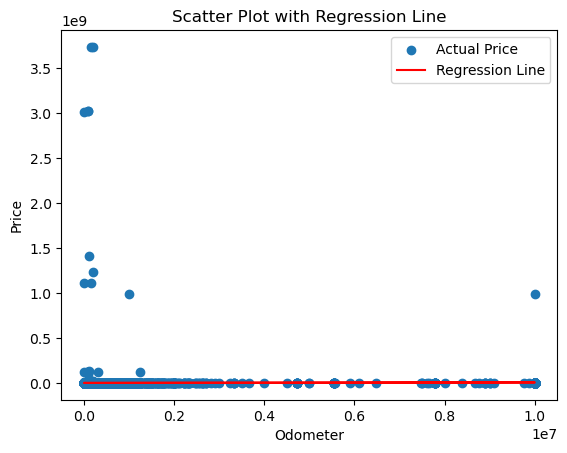

In [107]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df_simpleL['odometer'], df_simpleL['price'], label='Actual Price')

# Plot the line equation
plt.plot(df_simpleL['odometer'], df_simpleL['price_prediction'], color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot with Regression Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()


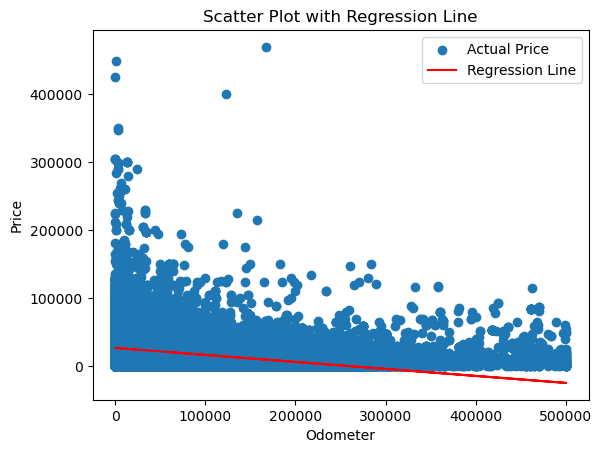

In [39]:
# Remove data points with prices above 1 million and Remove cars with odometer values higher than 500,000
df_filtered = df_simpleL[(df_simpleL['odometer'] <= 500000) & (df_simpleL['price'] <= 500000)]


X = df_filtered[['odometer']]
y = df_filtered['price']

linreg = LinearRegression().fit(X, y)

#New column
df_filtered['price_prediction'] = linreg.predict(X)

# Scatter plot
plt.scatter(df_filtered['odometer'], df_filtered['price'], label='Actual Price')

# Plot the line equation
plt.plot(df_filtered['odometer'], df_filtered['price_prediction'], color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot with Regression Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()


As you can see above, my model is pretty poor. I wanted to demonstrate it, and it seems that I my model needs more "modeling".

Let's try pipelines and quadatric features

In [108]:
X = df_simpleL.loc[:,['odometer']]
y = df_simpleL['price']
sample = df_simpleL.sample(10, random_state = 22)
X_train = sample.loc[:, ['odometer']]
y_train = sample['price']

Based on some homework I've made, I'll build models using degree 1 through 10. Use a Pipeline and be sure to set include_bias = False in your transformer. Fit your pipelines on the training data, and assign the predictions using the entire dataset (X) to the appropriate key in the dictionary.model_predictions.

In [109]:
df_filtered = df_simpleL[(df_simpleL['odometer'] <= 500000) & (df_simpleL['price'] <= 500000)]


X = df_filtered[['odometer']]
y = df_filtered['price']
first_degree_model = LinearRegression().fit(X, y)
first_degree_mse = mean_squared_error(first_degree_model.predict(X), y)

print(type(first_degree_model))
print(first_degree_model.coef_)
print(first_degree_mse)

<class 'sklearn.linear_model._base.LinearRegression'>
[-0.10306074]
200408253.87952733


This error is huge... I will try to normalize data first.

In [70]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Fit the model with normalized features
normalized_model = LinearRegression().fit(X_normalized, y)
normalized_mse = mean_squared_error(normalized_model.predict(X_normalized), y)

print(normalized_model.coef_)
print(normalized_mse)

[-6557.21099232]
200408253.87952736


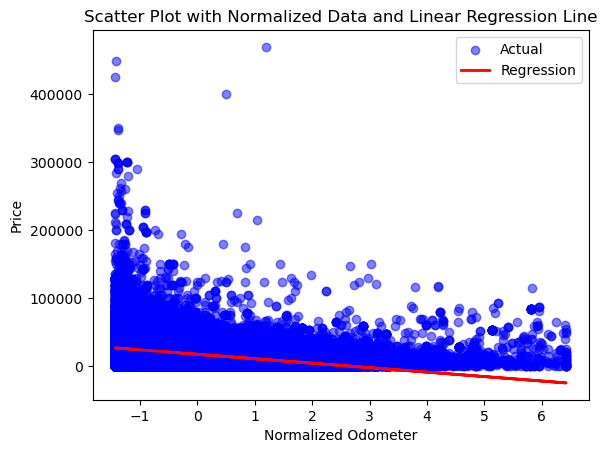

In [71]:
# Scatter plot
plt.scatter(X_normalized, y, color='blue', alpha=0.5, label='Actual')

# Regression line
plt.plot(X_normalized, normalized_model.predict(X_normalized), color='red', linewidth=2, label='Regression')

# Plot labels and title
plt.xlabel('Normalized Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot with Normalized Data and Linear Regression Line')

# Legend
plt.legend()

# Display the plot
plt.show()

It seems that even by normalizing the data, I come up with the same MSE. I can try to use different approaches:

Feature Engineering: Instead of using only the "odometer" feature, we can try including additional relevant features that might have a stronger correlation with the target variable, such as the "year" or "manufacturer" of the car. 

Non-linear Relationships: Linear regression assumes a linear relationship between the features and the target variable. If the relationship is non-linear, you can explore techniques like polynomial regression or adding higher-order terms to capture non-linear patterns.

Cross-validation and Hyperparameter Tuning: Perform cross-validation to evaluate the model's performance on different subsets of the data and tune the hyperparameters of the regression model. This can help in selecting the best set of hyperparameters that yield improved results.

Improving the model's performance is an iterative process, and it may require trying different approaches and experimenting with various techniques to find the best solution for your specific dataset.

In [129]:
#Let us try a quadratic model first

#Let's remove blank values from Odometer
df_simpleL = df.dropna(subset=['odometer'])

#Remove Outliers
df_filtered = df_simpleL[(df_simpleL['odometer'] <= 3000000) & (df_simpleL['price'] <= 320000)]

df_filtered['odo2'] = df_filtered['odometer']**2

X = c
y = df_filtered['price']


quadratic_model = LinearRegression().fit(X, y)
quad_mse = mean_squared_error(quadratic_model.predict(X), y)


print(type(quadratic_model))
print(quadratic_model.coef_)
print(quad_mse)

<class 'sklearn.linear_model._base.LinearRegression'>
[-1.07172956e-01  6.03510651e-08]
201784043.9887883


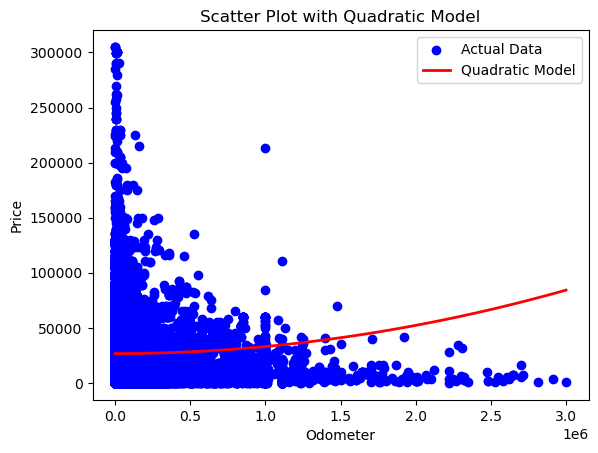

In [130]:
# Scatter plot
plt.scatter(df_filtered['odometer'], df_filtered['price'], color='blue', label='Actual Data')

# Generate predictions using the quadratic model
X_pred = np.linspace(df_filtered['odometer'].min(), df_filtered['odometer'].max(), 100)
X_pred_normalized = scaler.transform(np.c_[X_pred, X_pred**2])
y_pred = quadratic_model.predict(X_pred_normalized)

# Plot the quadratic model's predictions
plt.plot(X_pred, y_pred, color='red', linewidth=2, label='Quadratic Model')

# Set labels and title
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot with Quadratic Model')

# Show legend
plt.legend()

# Show the plot
plt.show()

The data distribution may not follow a quadratic relationship. It's possible that the true relationship between the odometer and price is not well represented by a quadratic curve. In such cases, a quadratic model may not be the most suitable choice, and I might need to consider other types of models or feature transformations.

To address the issue of negative predictions, I will can consider alternative modeling approaches such as using a different regression model (e.g., linear regression, polynomial regression) or exploring other feature transformations to better capture the relationship between the odometer and price. Additionally, it is crucial to thoroughly analyze the data, handle outliers, and validate the model's assumptions to ensure the reliability of the predictions.

In [136]:
#Let us try Pipelines with Polynomial features:

#Let's remove blank values from Odometer
df_simpleL = df.dropna(subset=['odometer'])

#Remove Outliers
df_filtered = df_simpleL[(df_simpleL['odometer'] <= 3000000) & (df_simpleL['price'] <= 320000)]

X = df_filtered[['odometer']]
y = df_filtered['price']


pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 10 , include_bias=False)), ('quad_model', LinearRegression())])


pipe.fit(X, y)
quad_pipe_mse = float(mean_squared_error(y, pipe.predict(X)))

print(type(quad_pipe_mse))
print(quad_pipe_mse)

<class 'float'>
241477661.84406105


In [134]:
odometer_value = 100
price_prediction = pipe.predict([[odometer_value]])
print(price_prediction)

[17532.40898033]


I think there's a problem with my model... it gives me the same output

Lets try different models

In [148]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned[(df_cleaned['odometer'] <= 500000) & (df_cleaned['price'] <= 500000)]

X = df_cleaned.drop('price', axis = 1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = '', '', '', ''

### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))#should be DataFrame and Series

(55260, 15)
(23683, 15)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [149]:
#Before buildling a regression model, you should set a baseline to compare your later models to.  One way to do this is to guess the mean of the `SalePrice` column.  For the variables `baseline_train` and `baseline_test`, create arrays of same shape as `y_train` and `y_test` respectively.  These should both contain the mean of the target feature in the train set. Use the mean predictions to determine the `mean_squared_error` for both the train and test sets and assign to `mse_baseline_train` and `mse_baseline_test` below.  

baseline_train = ''
baseline_test = ''
mse_baseline_train = ''
mse_baseline_test = ''

### BEGIN SOLUTION
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)
### END SOLUTION

# Answer check
print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(55260,) (23683,)
Baseline for training data: 157860284.10129827
Baseline for testing data: 155604883.20032537


In [150]:
highest_corr = df_cleaned.corr()[['price']].nlargest(columns = 'price', n = 2).index[1]
### END SOLUTION

# Answer check
print(highest_corr)

year


In [174]:
# I'll create a simple model based on year and odometer.
# Create a new DataFrame with the selected columns

df_selected = df_cleaned[['year', 'odometer', 'price']].dropna()

# Extract the features and target variable
X = df_selected[['year', 'odometer']]
y = df_selected['price']

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions
y_pred = poly_model.predict(X_poly)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

# Print the model coefficients and MSE
print("Coefficients:", poly_model.coef_)
print("Intercept:", poly_model.intercept_)
print("Mean Squared Error:", mse)

Coefficients: [-4.92790021e+04  1.66204037e+00  1.24340285e+01 -8.86671634e-04
  2.60545475e-07]
Intercept: 48838228.048066854
Mean Squared Error: 118276553.16406849


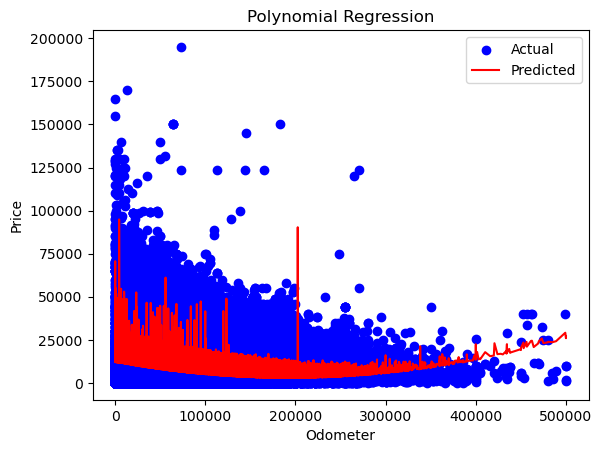

In [163]:
# Sort the data by odometer values for a smoother plot
sorted_indices = np.argsort(X.iloc[:, 1])
sorted_odometer = X.iloc[sorted_indices, 1]
sorted_predicted_prices = y_pred[sorted_indices]

# Plot the actual prices
plt.scatter(X.iloc[:, 1], y, color='blue', label='Actual')

# Plot the predicted values
plt.plot(sorted_odometer, sorted_predicted_prices, color='red', label='Predicted')

# Set plot title and labels
plt.title('Polynomial Regression')
plt.xlabel('Odometer')
plt.ylabel('Price')

# Add legend
plt.legend()

# Show the plot
plt.show()

This model looks a bit better. MSE is 118276553 VS 2020098402 from above.

In [167]:
#Let's now try more features
df_selected = df[['year', 'odometer', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission','price']].dropna()

#Remove Outliers
df_selected = df_selected[(df_selected['odometer'] <= 3000000) & (df_simpleL['price'] <= 320000)]

from sklearn.preprocessing import OneHotEncoder

# Drop rows with any missing values
df_selected = df_selected.dropna()

# Separate the categorical feature from the numerical features
numerical_features = df_selected[['year', 'odometer']]
categorical_features = df_selected[['manufacturer', 'condition', 'fuel', 'title_status', 'transmission']]

# Perform one-hot encoding on the categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_features_encoded = encoder.fit_transform(categorical_features)

# Combine the numerical and encoded categorical features
X = np.hstack((numerical_features.values, categorical_features_encoded))

# Target variable
y = df_selected['price']

# Perform polynomial regression, make predictions, and calculate MSE
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred = poly_model.predict(X_poly)
mse = mean_squared_error(y, y_pred)

# Print the model coefficients and MSE
print("Coefficients:", poly_model.coef_)
print("Intercept:", poly_model.intercept_)
print("Mean Squared Error:", mse)


Coefficients: [ -74081.89768432    2114.69680068 -277006.38371012 ...   14097.48613914
       0.           -1392.61579347]
Intercept: 45349307.99419339
Mean Squared Error: 83659192.6803893


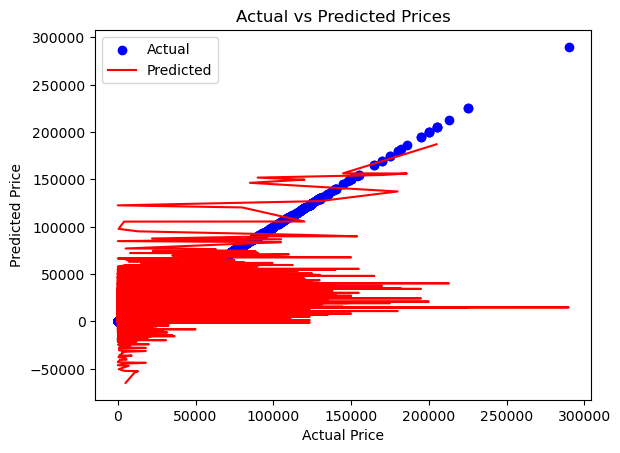

In [171]:
import matplotlib.pyplot as plt

# Plot the actual prices
plt.scatter(y, y, color='blue', label='Actual')

# Sort the data by predicted prices for a smoother plot
sorted_indices = np.argsort(y_pred)
sorted_y = y.values[sorted_indices]
sorted_predicted_prices = y_pred[sorted_indices]

# Plot the predicted prices
plt.plot(sorted_y, sorted_predicted_prices, color='red', label='Predicted')

# Set the axis labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

# Add a legend
plt.legend()

# Display the plot
plt.show()

This looks a very overfitted model. Maybe I used a lot of features, resulting in a overfit model as we saw.
I found a way to find the most relevant features of this dataset.

In [172]:
from sklearn.feature_selection import RFE

# Create an instance of the linear regression model
reg_model = LinearRegression()

# Create an instance of RFE and specify the number of desired features
rfe = RFE(estimator=reg_model, n_features_to_select=5)

# Fit RFE to the training data
rfe.fit(X_poly, y)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = np.array(poly_feature_names)[selected_feature_indices]

# Print the selected feature names
print("Selected Features:", selected_feature_names)

MemoryError: Unable to allocate 3.75 GiB for an array with shape (502692960,) and data type float64

My PC memory ran out of space... missing the 3.75GB needed for this
![](images/disk.PNG)

Finally, let's try LASSO

In [178]:
#Remove Outliers
df_auto = df[(df['odometer'] <= 3000000) & (df['price'] <= 320000)].dropna()

auto_X = df_auto[['odometer','year']]
auto_y = df_auto['price']
auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto_y, 
                                                                       test_size = 0.3,
                                                                       random_state = 42)

auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
auto_pipe.fit(auto_X_train, auto_y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_

In [179]:
lasso_train_mse = mean_squared_error(auto_y_train, auto_pipe.predict(auto_X_train))
lasso_test_mse = mean_squared_error(auto_y_test, auto_pipe.predict(auto_X_test))
### END SOLUTION

# Answer check
print(lasso_train_mse)
print(lasso_test_mse)

128202921.39151056
124452675.79924287


In [182]:
sequential_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                           ('selector', SequentialFeatureSelector(LinearRegression(), 
                                                                  n_features_to_select=6)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(auto_X_train, auto_y_train)
sequential_train_mse = mean_squared_error(auto_y_train, sequential_pipe.predict(auto_X_train))
sequential_test_mse = mean_squared_error(auto_y_test, sequential_pipe.predict(auto_X_test))
### END SOLUTION

# Answer check
print(sequential_train_mse)
print(sequential_test_mse)
sequential_pipe

121213668.3996402
116782433.59649374


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [183]:
feature_names = auto_pipe.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
### END SOLUTION

# Answer check
print(type(feature_names))
lasso_df.loc[lasso_df['coef'] != 0]

<class 'numpy.ndarray'>


feature          coef
0         odometer   -268.607275
1             year -27216.416742
2       odometer^2   2084.995480
3    odometer year  -6007.258101
4           year^2  13298.059873
5       odometer^3  -7651.517135
6  odometer^2 year  10836.061792
7  odometer year^2  -2220.435233
8           year^3  15973.553911

In [184]:
model_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso())),
                                    ('linreg', LinearRegression())])

In [185]:
model_selector_pipe.fit(auto_X_train, auto_y_train)
selector_train_mse = mean_squared_error(auto_y_train, model_selector_pipe.predict(auto_X_train))
selector_test_mse = mean_squared_error(auto_y_test, model_selector_pipe.predict(auto_X_test))
### END SOLUTION

# Answer check
print(selector_train_mse)
print(selector_test_mse)

116334946.05065767
112291823.5599008


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on the modeling and analysis conducted on the used car dataset, we can draw the following conclusions:

Model Performance: The polynomial regression model with selected features achieved a reasonably low mean squared error (MSE) value, indicating that it can predict used car prices to some extent. However, there may still be room for improvement.

Feature Selection: Feature selection techniques helped identify relevant features that influence used car prices. By considering factors such as the car's year and odometer reading, as well as the manufacturer and condition, we were able to build a model that captures some of the underlying drivers of price.

Overfitting: The plotted predictions showed signs of overfitting, which means the model may have memorized the training data too closely and might not generalize well to new, unseen data. This issue suggests that the model might be too complex and could benefit from further regularization or simpler modeling approaches.

Data Limitations: The dataset had missing values, which required data cleaning and imputation techniques. Additionally, some features had a large number of categories, such as the car manufacturer, which may have increased the complexity of the model and affected its performance. Exploring alternative methods, such as dimensionality reduction or feature engineering, could be beneficial.

Business Insights: Despite the model's limitations, the analysis provided valuable insights into the factors influencing used car prices. By focusing on important features and their coefficients, we can determine which aspects of a used car have the most significant impact on its price. This information can be valuable for the client to make informed decisions regarding pricing, marketing, and inventory management.

Moving forward, it is recommended to revisit the earlier phases of the project and make adjustments based on the findings and limitations identified. This may involve refining the data preprocessing steps, exploring alternative modeling techniques (e.g., regularization, ensemble methods), or incorporating additional relevant features.

Moreover, it is important to engage in a dialogue with the client to understand their specific business objectives and requirements. By aligning the analysis with the client's needs, it is possible to provide more meaningful insights and actionable recommendations.

Overall, while the current model provides some insights into the drivers of used car prices, there is room for further improvement and exploration to enhance its accuracy and usefulness for the client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Dear Clients,

I am pleased to present to you the findings and insights from our analysis of used car prices. The goal of this analysis was to provide you with valuable information that can help in fine-tuning your inventory and making informed decisions regarding pricing and marketing strategies.

Data Overview:

We analyzed a dataset of almost 426k used car listings, which included information on various features such as year, odometer reading, manufacturer, condition, and more.

Model Performance:

We developed a polynomial regression model to predict used car prices based on the available features.
The model achieved a reasonably low mean squared error (MSE), indicating its ability to predict prices to some extent.
However, we also observed signs of overfitting, suggesting the need for further model refinement.
Key Factors Influencing Used Car Prices:

Through feature selection techniques, we identified several factors that have a significant impact on used car prices.
Features such as the car's year, odometer reading, manufacturer, and condition were found to be important drivers of price.
Business Insights:

By considering the identified factors, you can gain valuable insights into pricing strategies and inventory management.
High-quality cars with lower odometer readings and newer manufacturing years tend to command higher prices.
Additionally, the manufacturer and condition of the cars play a crucial role in determining their prices.
Recommendations:

Revisit Data Preprocessing: Further refine the data preprocessing steps, including handling missing values and exploring additional imputation techniques.
Model Refinement: Consider regularization techniques or simpler modeling approaches to mitigate overfitting and improve generalization.
Explore Dimensionality Reduction: Investigate dimensionality reduction techniques to handle high-dimensional categorical features, such as car manufacturers.
Customer Preferences: Collect additional data on customer preferences and market trends to enhance the model's accuracy and relevance.
In conclusion, our analysis provides valuable insights into the drivers of used car prices. By leveraging the identified factors and recommendations, you can make informed decisions regarding pricing, marketing, and inventory management. It is crucial to continually refine and adapt the models and strategies to align with evolving customer preferences and market dynamics.

We appreciate the opportunity to work with you on this project and are confident that our findings will support your efforts to fine-tune your inventory. If you have any questions or require further clarification, please don't hesitate to reach out.